In [1]:
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow.keras as K
from tensorflow.keras.layers import Dense

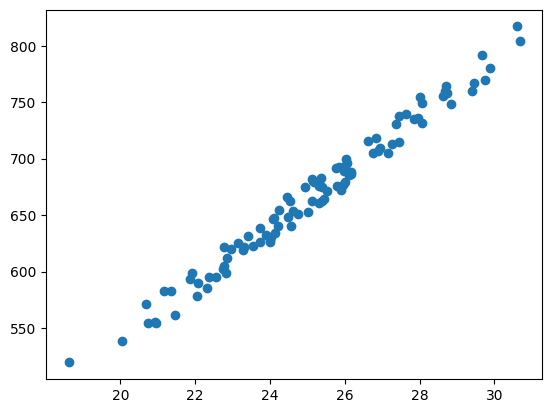

In [2]:
#Generate a random data with random noise
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20,50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area', 'price'])
plt.scatter(data['area'],data['price'])
plt.show()

In [3]:
# Generalize the data - in order to reserve computational power - (large numbers make large calculations)
data = (data - data.min()) / (data.max() - data.min()) # Normalize

In [4]:
# Build the model
model = K.Sequential([
    Dense(1, input_shape = [1,],  activation=None)
])

c:\Users\erand\anaconda3\envs\study\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Define loss function and optimizer
model.compile(loss = 'mean_squared_error', optimizer='sgd')

In [7]:
# Model training
model.fit(x=data['area'], y = data['price'], epochs=100, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.1579 - val_loss: 0.1761
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1475 - val_loss: 0.1553
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1235 - val_loss: 0.1372
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1043 - val_loss: 0.1206
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0993 - val_loss: 0.1072
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0832 - val_loss: 0.0955
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0765 - val_loss: 0.0852
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0626 - val_loss: 0.0762
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0625 - val_loss: 0.0686
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0499 - val_loss: 0.0616
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0487 - val_loss: 0.0558
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0421 - val_lo

In [8]:
# predicted value
y_pred = model.predict(data['area'])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [9]:
y_pred

array([[0.67766964],
       [0.5366137 ],
       [0.5964513 ],
       [0.7269852 ],
       [0.68837434],
       [0.39415735],
       [0.59348834],
       [0.47957525],
       [0.48455378],
       [0.5376935 ],
       [0.510126  ],
       [0.64563185],
       [0.57393646],
       [0.5078126 ],
       [0.54113376],
       [0.5297379 ],
       [0.6497486 ],
       [0.47401106],
       [0.5276067 ],
       [0.40689704],
       [0.231195  ],
       [0.562827  ],
       [0.58463   ],
       [0.41847306],
       [0.7299701 ],
       [0.34481627],
       [0.49996123],
       [0.47587   ],
       [0.653751  ],
       [0.647192  ],
       [0.5112537 ],
       [0.53433895],
       [0.40341276],
       [0.29037204],
       [0.45924726],
       [0.5113987 ],
       [0.6224673 ],
       [0.6195806 ],
       [0.45517093],
       [0.46396425],
       [0.38678598],
       [0.34836856],
       [0.31876394],
       [0.69698083],
       [0.44251987],
       [0.44992256],
       [0.36566293],
       [0.575

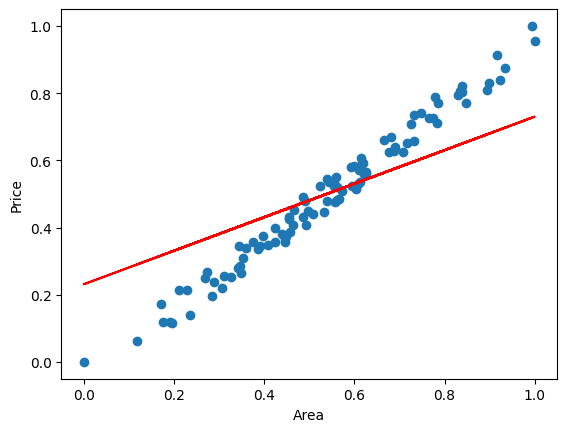

In [12]:
# plot predicted and actual data
plt.plot(data['area'], y_pred, color='red', label="Predicted Price")
plt.scatter(data['area'], data['price'], label = "Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [14]:
# Coefficients of W and b
model.weights

[<Variable path=sequential/dense/kernel, shape=(1, 1), dtype=float32, value=[[0.49877506]]>,
 <Variable path=sequential/dense/bias, shape=(1,), dtype=float32, value=[0.231195]>]